<a href="https://colab.research.google.com/github/sush995/MLProjectsLevel1/blob/main/CarPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('car data.csv')

In [ ]:
df.head()

In [ ]:
df.shape

(301, 9)

In [ ]:
### Find Categorical Values
print(df['Seller_Type'].unique())
print(df['Owner'].unique())
print(df['Fuel_Type'].unique())
print(df['Transmission'].unique())

['Dealer' 'Individual']
[0 1 3]
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']


In [ ]:
### Find Missing Values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
final_dataset=df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [ ]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
final_dataset['Current Year']=2020

In [ ]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [ ]:
final_dataset['No.of Years']=final_dataset['Current Year']-final_dataset['Year']

In [ ]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year,No.of Years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [ ]:
final_dataset.drop(['Year'],axis=1,inplace=True)

In [ ]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year,No.of Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [ ]:
final_dataset.drop(['Current Year'],axis=1,inplace=True)

In [ ]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No.of Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [ ]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)

In [ ]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No.of Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [ ]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,No.of Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
No.of Years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


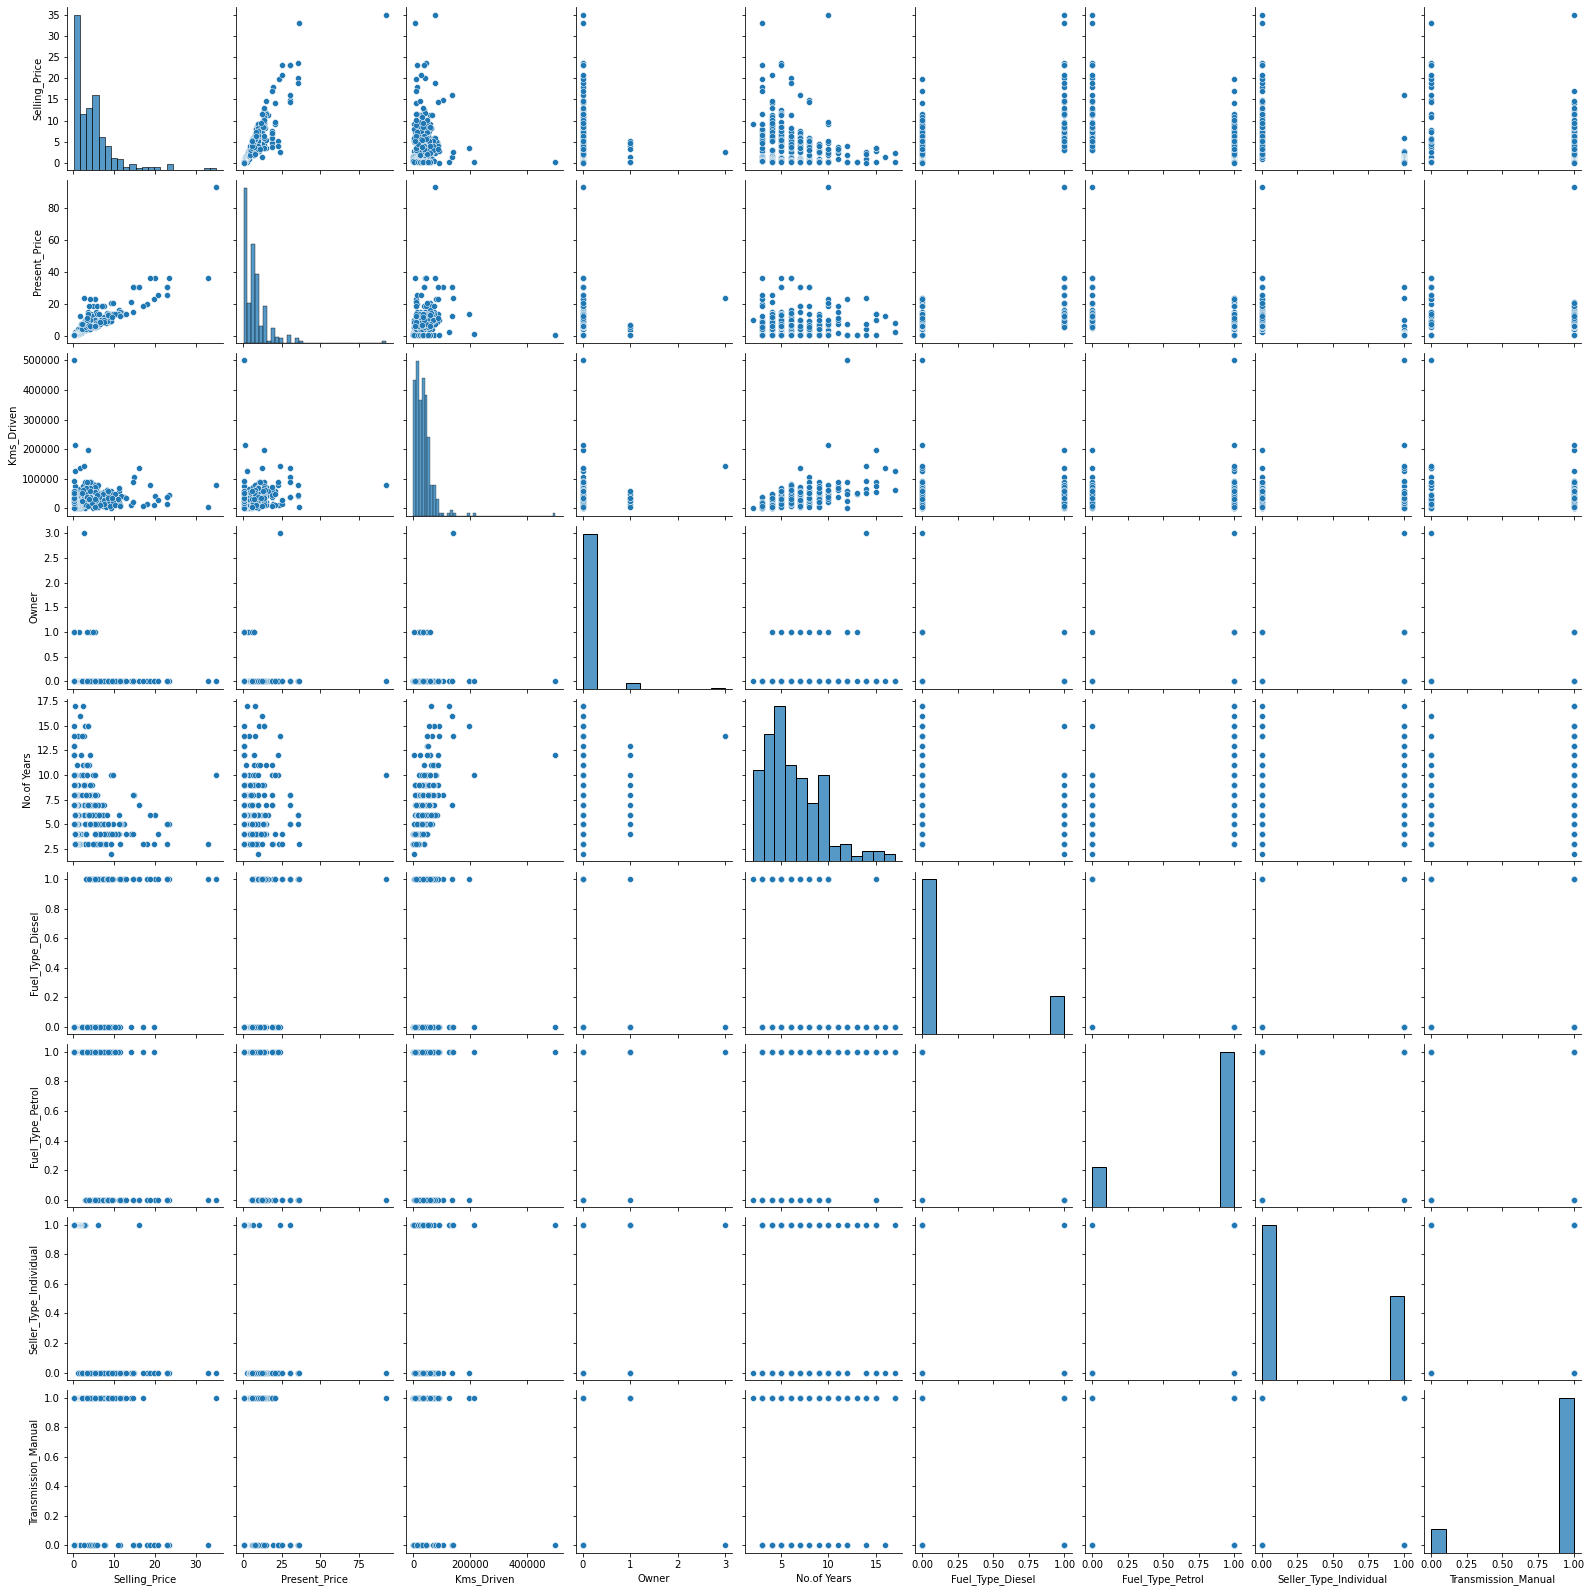

In [ ]:
import seaborn as sns
sns.pairplot(final_dataset)

In [ ]:
import matplotlib.pyplot as plt


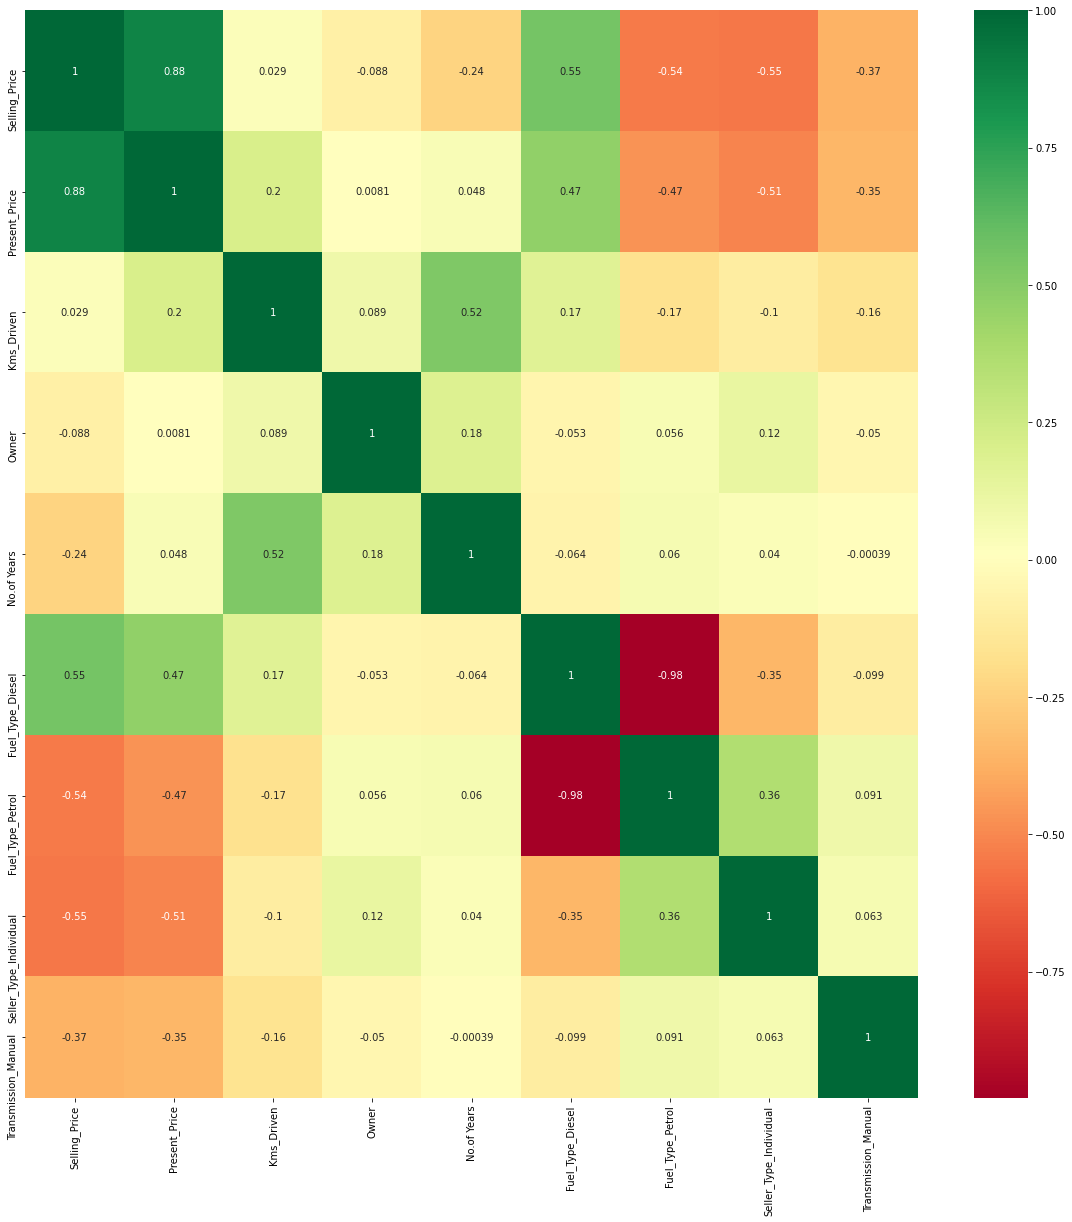

In [ ]:
cormat=final_dataset.corr()
top_corr_feature=cormat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(final_dataset[top_corr_feature].corr(),annot=True,cmap='RdYlGn')

In [ ]:
### independent and dependent features
x=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [ ]:
x.head()

,Present_Price,Kms_Driven,Owner,No.of Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [ ]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [ ]:
### Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [ ]:
print(model.feature_importances_)

[4.19225634e-01 3.80190096e-02 4.09125641e-04 7.65426288e-02
 2.09810090e-01 1.25984227e-02 1.16219947e-01 1.27175142e-01]


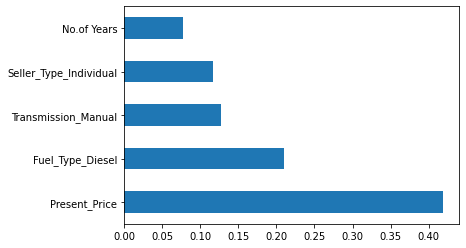

In [ ]:
### plot graph of Feature Importance for better visualization
feat_importances=pd.Series(model.feature_importances_,index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
x_train.shape

(240, 8)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()

In [ ]:
### Hyperparameters
import numpy as np
n_estimators=[int(x) for x in np.linspace(start=100, stop=1200, num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [ ]:
#Randomized search CV

# Number of Trees in Decision Forest
n_estimators=[int(x) for x in np.linspace(start=100, stop=1200, num=12)]
# Number of Features to Consider at every split
max_features=['auto', 'sqrt']
# Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=30)]
# max_depth.append(None)
# Miniimum number of samples required to split a node
min_samples_split=[2,5,10,15,100]
# Minimum number of samples at each leaf node
min_samples_leaf=[1,2,5,10]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Create the Random Grid
random_grid={'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 5, 6, 7, 8, 9, 10, 11, 11, 12, 13, 14, 15, 16, 17, 17, 18, 19, 20, 21, 22, 23, 23, 24, 25, 26, 27, 28, 29, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [ ]:
# Use random grid to search for best Hyperparameter
# First create the base model to tune
rf=RandomForestRegressor()

In [ ]:
rf_random=RandomizedSearchCV(estimator=rf, param_distributions=random_grid, 
                             scoring= 'neg_mean_squared_error', n_iter=10, cv=5, verbose=2, 
                             random_state=42, n_jobs=1)

In [ ]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=17 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=17, total=   1.6s
[CV] n_estimators=1100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=17 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV]  n_estimators=1100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=17, total=   1.5s
[CV] n_estimators=1100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=17 
[CV]  n_estimators=1100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=17, total=   1.5s
[CV] n_estimators=1100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=17 
[CV]  n_estimators=1100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=17, total=   1.5s
[CV] n_estimators=1100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=17 
[CV]  n_estimators=1100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=17, total=   1.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=5 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=900, min_samples_split=5, min

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   40.0s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
predictions=rf_random.predict(x_test)

In [ ]:
predictions

array([ 4.98559413,  5.22584805, 11.58588449,  7.70145022,  7.97518075,
        0.58662114,  0.5493942 ,  9.200269  ,  4.20248407,  8.59705255,
        7.70899383,  3.46624684,  4.98512606,  2.60679053,  0.27392641,
        3.9047855 ,  3.25851849,  6.04077689,  0.21130348,  0.57058178,
        5.10775173,  5.7606689 ,  7.39381064,  9.8237183 ,  0.63815211,
        0.19218731,  3.25078422, 23.57823148,  2.47329847,  0.24292541,
        5.00534018, 23.94262295,  0.41771394,  3.06915031,  5.39742946,
        5.15057845,  2.97320269,  1.20813674,  1.0480175 ,  0.76844433,
        3.0880511 ,  4.94438598,  5.29482175,  0.33293923,  4.60528135,
        4.95135696,  4.84291909,  6.10809081,  1.23260903,  0.38236942,
        0.33091579,  4.04140855,  3.08882383,  6.16392305,  0.52962237,
        1.08723762,  4.43316634,  8.69449149,  9.1905794 ,  1.16636611,
        0.41588783])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


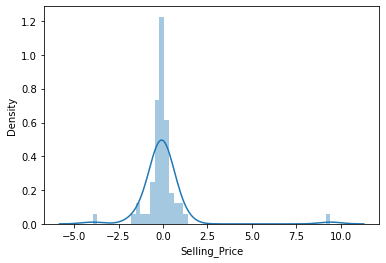

In [ ]:
sns.distplot(y_test-predictions)

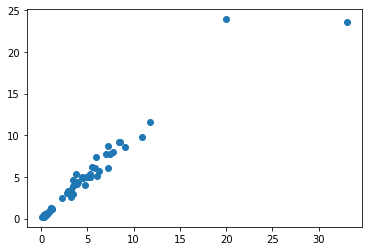

In [ ]:
plt.scatter(y_test,predictions)

In [52]:
import pickle
#open a file where you want to store data
with open('random_forest_regression_model.pkl', 'wb') as fid:
     pickle.dump(rf_random, fid)
